## Story Telling: Is the Airbnb NYC listing price normally distributed? 
                                                By Muluemebet Ayalew
                                                   March ,2020


In [17]:
#Important libraries

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import skew     # to calculate the skewness of numerical columns
import statsmodels.api as sm     # to graph QQplot
%matplotlib inline

### Read the data 

In [3]:
# original data
ny= pd.read_csv("listings.csv", parse_dates=["last_review"]) # read the last_review column as datetime

In [14]:
#This data has non zero price
new_ny= pd.read_csv("NYC_cleaned.csv", parse_dates=["last_review"])# read the cleaned data for further analysis

### Price distribution of the original data
The distribution is  skewed to the right and there are large data to display.

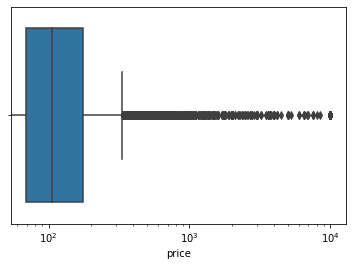

In [4]:
sns.boxplot("price", data=ny, orient="H")
plt.xscale("log")

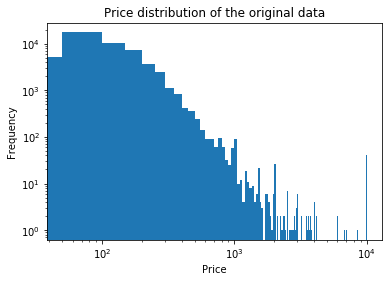

In [16]:
# histogram of price with log scale of x and y axis 
ny["price"].plot(kind="hist", logx=True, logy=True, bins=200)
_=plt.xlabel("Price")
_=plt.title("Price distribution of the original data")

### Price distribution for different price range
Better than displaying the whole data set.

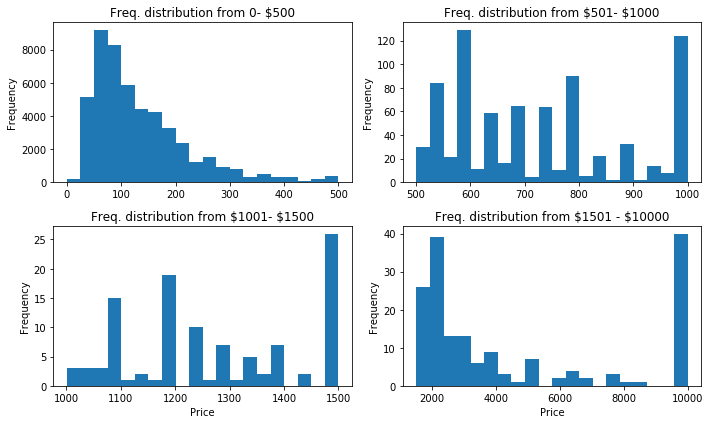

In [42]:
# zoom and look at the price distribution with differnt price range
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
ny["price"].plot( kind="hist", bins=20, range=(0,500), title="Freq. distribution from 0- $500")

plt.subplot(2,2,2)
ny["price"].plot( kind="hist", bins=20, range=(501,1000), title="Freq. distribution from $501- \$1000")

plt.subplot(2,2,3)
ny["price"].plot( kind="hist", bins=20, range=(1001,1500),title="Freq. distribution from $1001- \$1500")
plt.xlabel("Price")

plt.subplot(2,2,4)
ny["price"].plot( kind="hist", bins=20, range=(1501,10000),title="Freq. distribution from $1501 - \$10000")
plt.xlabel("Price")
plt.tight_layout()

### Empirical Cumulative Distribution Function (ECDF)
It shows the proportion of the data below a certain price.  

In [11]:
# compute the emprical comulative distribution function 
def ecdf(data):
    x= np.sort(data)
    y=np.arange(1,len(x)+1)/len(x)
    return x,y

### ECDF of the original data

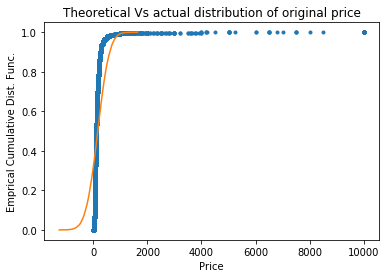

In [44]:
# The price is not normally distributed , original data
sample= np.random.normal(loc=ny.price.mean(), scale=np.std(ny.price, ddof=1),size=50000)
x_theor, y_theor= ecdf(sample)
x,y= ecdf(ny.price)
_=plt.plot(x,y, marker=".", linestyle="none")
_=plt.plot(x_theor,y_theor)
_=plt.title("Theoretical Vs actual distribution of original price")
_=plt.xlabel("Price")
_=plt.ylabel("Emprical Cumulative Dist. Func.")

### ECDF after removing outliers above  (mean+3*std)

In [40]:
meanp= new_ny.price.mean()
stdp= new_ny.price.std()
no_outlierp= new_ny.price[new_ny.price<(meanp+(3*stdp))]

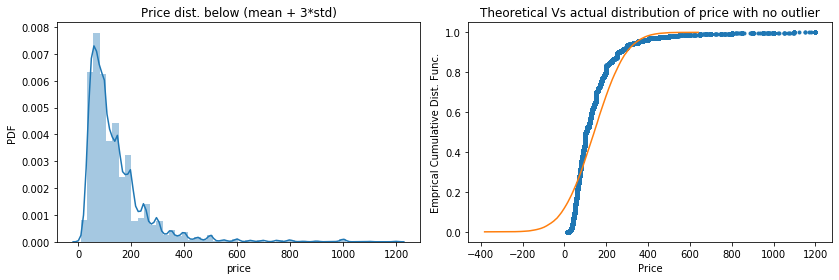

In [57]:
# plot cleaned data, outliers removed 
plt.figure(figsize=(12,4))

# subplot for price distibution
plt.subplot(121) 
_=sns.distplot(no_outlierp,bins=50) 
_=plt.title("Price dist. below (mean + 3*std)")
_=plt.ylabel("PDF")

#ECDF plot
plt.subplot(122)
sample= np.random.normal(loc=no_outlierp.mean(), scale=np.std(no_outlierp, ddof=1),size=50000)
x_theor, y_theor= ecdf(sample)
x,y= ecdf(no_outlierp)
_=plt.plot(x,y, marker=".", linestyle="none")
_=plt.plot(x_theor,y_theor)
_=plt.title("Theoretical Vs actual distribution of price with no outlier")
_=plt.xlabel("Price")
_=plt.ylabel("Emprical Cumulative Dist. Func.")
plt.tight_layout()

### ECDF after log transformation of price

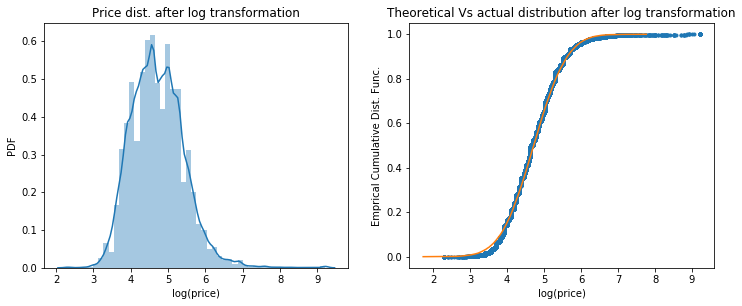

In [66]:
plt.figure(figsize=(12,4.5))

logp=np.log(new_ny.price)

# subplot for log transformed price distibution
plt.subplot(121) 
_=sns.distplot(logp,bins=50) 
_=plt.title("Price dist. after log transformation")
_=plt.xlabel("log(price)")
_=plt.ylabel("PDF")


plt.subplot(122) 
sample= np.random.normal(loc=logp.mean(), scale=np.std(logp, ddof=1),size=50000)
x_theor, y_theor= ecdf(sample)
x,y= ecdf(logp)
_=plt.plot(x,y, marker=".", linestyle="none")
_=plt.plot(x_theor,y_theor)
_=plt.title("Theoretical Vs actual distribution after log transformation")
_=plt.xlabel("log(price)")
_=plt.ylabel("Emprical Cumulative Dist. Func.")

### Combining the last two: Prices below (mean+ 3 *std) and log transformed

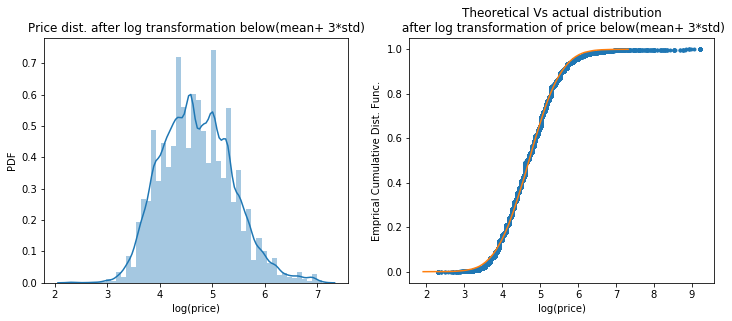

In [72]:
plt.figure(figsize=(12,4.5))

log_no_outlr=np.log(no_outlierp)

# subplot for log transformed+ nooutlier price distibution
plt.subplot(121) 
_=sns.distplot(log_no_outlr,bins=50) 
_=plt.title("Price dist. after log transformation below(mean+ 3*std)")
_=plt.xlabel("log(price)")
_=plt.ylabel("PDF")

plt.subplot(122) 
sample= np.random.normal(loc=log_no_outlr.mean(), scale=np.std(log_no_outlr, ddof=1),size=50000)
x_theor, y_theor= ecdf(sample)
x,y= ecdf(logp)
_=plt.plot(x,y, marker=".", linestyle="none")
_=plt.plot(x_theor,y_theor)
_=plt.title("Theoretical Vs actual distribution\n after log transformation of price below(mean+ 3*std)")
_=plt.xlabel("log(price)")
_=plt.ylabel("Emprical Cumulative Dist. Func.")

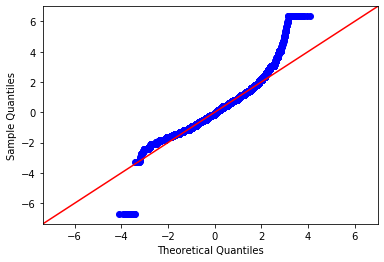

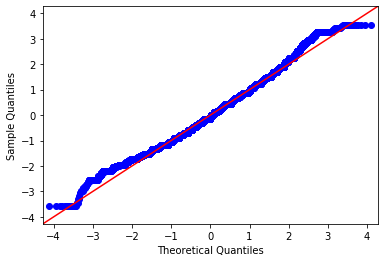

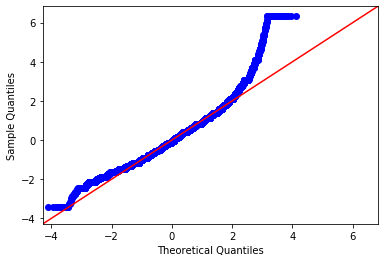

In [79]:

# Q-Q plot

_=sm.qqplot(np.log1p(ny.price),  fit=True, line='45', label="original price")
_=sm.qqplot(np.log(no_outlierp),  fit=True, line='45', label="price below(mean+3*std)")
_=sm.qqplot(np.log(new_ny.price),  fit=True, line='45', label="log transformed")




### Summary
The original listing price is highly skewed to the right and difficult to assume normal distribution. 
After log transformation, it looks normally distributed. Removing outlier and log transformation even make the price distribution looks normal
